In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import re
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:

import pandas as pd
link = r"/content/gdrive/MyDrive/ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Test_NoLabel.csv/ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv"
df = pd.read_csv(link, error_bad_lines=False, encoding='utf-8')

<ipython-input-3-fd6a99df7547>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(link, error_bad_lines=False, encoding='utf-8')
Skipping line 446: expected 10 fields, saw 13
Skipping line 614: expected 10 fields, saw 11
Skipping line 2576: expected 10 fields, saw 13
Skipping line 2762: expected 10 fields, saw 18
Skipping line 3384: expected 10 fields, saw 11
Skipping line 3831: expected 10 fields, saw 11
Skipping line 3892: expected 10 fields, saw 12
Skipping line 4037: expected 10 fields, saw 11
Skipping line 4042: expected 10 fields, saw 12
Skipping line 4739: expected 10 fields, saw 16
Skipping line 4846: expected 10 fields, saw 11
Skipping line 5306: expected 10 fields, saw 11
Skipping line 6271: expected 10 fields, saw 16
Skipping line 7853: expected 10 fields, saw 11
Skipping line 8970: expected 10 fields, saw 11
Skipping line 9937: expected 10 fields, saw 16
Skipping li

In [4]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [5]:
def create_word_cloud(df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df['commentText']:
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    comment_words = remove_emojis(comment_words)

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

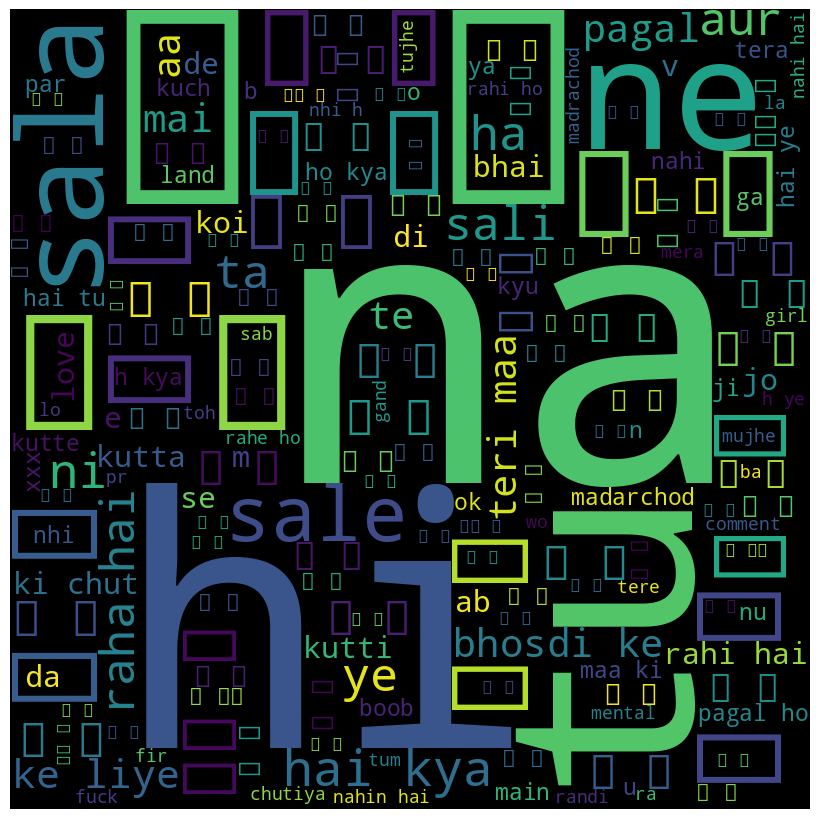

In [6]:
abusive_df = df[df['label'] == 1]
create_word_cloud(abusive_df)

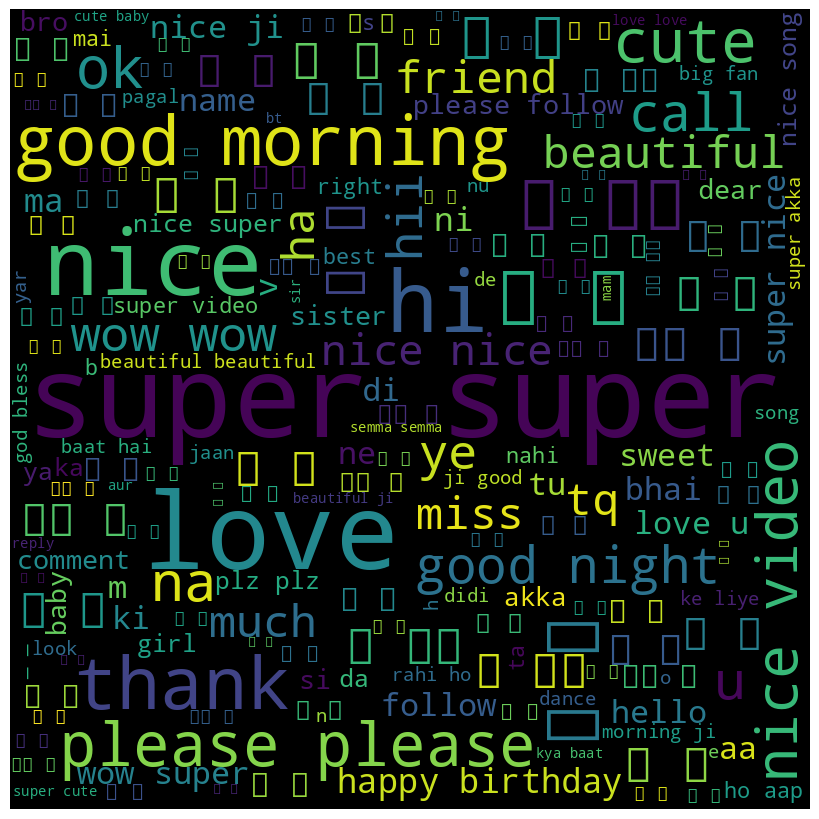

In [7]:
nonabusive_df = df[df['label'] == 0]
create_word_cloud(nonabusive_df)

## Data set splitting and analysis

In [8]:
data = df.copy()

In [9]:
df = df.dropna()

comments = df['commentText'].values
labels = df['label']
df.drop('label', axis=1)

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post
0,0,randi ka deewana,Assamese,2869,175913,0,1,0.0,65.0
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1.0,94.0
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0.0,731.0
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1.0,285.0
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0.0,453.0
...,...,...,...,...,...,...,...,...,...
1483501,1500893,pavam🤣 😁😻😻😻😻,Malayalam,7201.0,661099.0,0.0,0.0,1.0,28.0
1483502,1500894,enik ind post ittittila 😔,Malayalam,16000.0,905283.0,0.0,0.0,2.0,28.0
1483503,1500895,nirmelp34 parayilla,Malayalam,10028.0,339564.0,0.0,0.0,0.0,28.0
1483504,1500896,ettan🙈😘,Malayalam,5552.0,397363.0,0.0,0.0,2.0,28.0


In [10]:
unique_types = labels.unique()
print(unique_types)

[1. 0.]


In [11]:
unique_types = df['language'].unique()
print(unique_types)

['Assamese' 'Rajasthani' 'Urdu' 'Odia' 'Hindi' 'Telugu' 'Bengali'
 'English' 'Kannada' 'Marathi' 'Punjabi' 'Bhojpuri' 'Gujarati' 'Haryanvi'
 'Malayalam' 'Tamil']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, stratify=labels, random_state=42)

In [13]:
x_train = pd.DataFrame(X_train)
x_train.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label
789870,799051,💜🍁🌼🌼👌👌👌👌🏿👌🏿👌🏿🌷,Telugu,86604.0,1058475.0,0.0,0.0,0.0,0.0,0.0
679923,688069,37514674201 😁😁😁😁😁😁😁😁,Tamil,68817,284083,0,4.0,0.0,1813.0,0.0
448876,453381,എടി myre നിനക്ക് വേറെ വെല്ലോ നീ ഞങ്ങൾ പെണ്ണുങ്...,Malayalam,43894.0,50723.0,0.0,4.0,0.0,208.0,1.0
1334080,1348985,sanumongeorge 🤩,Malayalam,35793.0,881306.0,0.0,0.0,0.0,13.0,0.0
1202213,1215873,aapki aadhi bra dikh rahi hai,Hindi,285072,680830,0.0,0.0,0.0,7.0,1.0


In [14]:
unique_types = x_train['language'].unique()
print(unique_types)

['Telugu' 'Tamil' 'Malayalam' 'Hindi' 'Kannada' 'Bengali' 'Bhojpuri'
 'English' 'Odia' 'Punjabi' 'Marathi' 'Gujarati' 'Rajasthani' 'Haryanvi'
 'Urdu' 'Assamese']


In [15]:
x_test = pd.DataFrame(X_test)
x_test.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label
1289674,1303964,chutiya swaal,Hindi,217704.0,952462,0.0,0.0,0.0,11.0,1.0
197472,199846,"""ma appka bahat bara fan ho!ma apko ak time p...",Bengali,29462.0,158439.0,0.0,1.0,1.0,186.0,0.0
87403,88425,moti apana pahali pat aandhar kar phir video b...,Hindi,233426,334753,0,0,0,255,1.0
171698,173680,o nibbi vo said me sheet khali to hai,Hindi,68850,430823,0,3,0.0,1483.0,0.0
452082,456638,അടിപൊളി 🔥🔥🔥🔥🔥,Malayalam,30510.0,309814.0,0.0,0.0,0.0,29.0,0.0


In [16]:
unique_types = x_test['language'].unique()
print(unique_types)

['Hindi' 'Bengali' 'Malayalam' 'Telugu' 'Bhojpuri' 'English' 'Punjabi'
 'Tamil' 'Kannada' 'Marathi' 'Odia' 'Assamese' 'Gujarati' 'Haryanvi'
 'Rajasthani' 'Urdu']


In [17]:
type_counts = x_test['language'].value_counts()

In [18]:
type_counts

Hindi         147968
English        52005
Malayalam      48419
Telugu         43836
Tamil          38045
Punjabi        30364
Kannada        24171
Bengali        14117
Odia           11410
Bhojpuri       11167
Marathi         9050
Gujarati        7055
Haryanvi        3838
Rajasthani      1550
Assamese        1043
Urdu             948
Name: language, dtype: int64

# Deep Learning Implementation

In [19]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.optimizers import Adam
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [20]:
# print(history)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
def plot_graph_of_history(histories, arch_name, epoch_range):
    for history in range(len(histories)):
        i = history
        history = histories[i]
        loss_train = history.history['accuracy']
        loss_val = history.history['val_accuracy']
        epochs = range(1,epoch_range)
        plt.plot(epochs[:len(loss_train)], loss_train, label='Training accuracy {}'.format(arch_name[i]))
        plt.plot(epochs[:len(loss_val)], loss_val, label='validation accuracy {}'.format(arch_name[i]))
        plt.xlim(1, epoch_range + 1)
        plt.title('Training and Validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.show()

In [21]:
X_train, X_test = X_train['commentText'], X_test['commentText']

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

### Preprocessing of dataset in appropriate format

In [23]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)

# Pad sequences
max_seq_length = 100
X_train = pad_sequences(sequences, maxlen=max_seq_length)

In [24]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_seq_length = 100
X_test = pad_sequences(sequences, maxlen=max_seq_length)

### Deep Neural Network

In [ ]:
# define the model architecture
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# train the model
history_nn = model.fit(X_train, y_train, epochs=100, batch_size=2048, validation_split=0.2, callbacks=[es])

Epoch 1/100
406/406 [==============================] - 4s 6ms/step - loss: 1921.6222 - accuracy: 0.6827 - val_loss: 830.8347 - val_accuracy: 0.7548
Epoch 2/100
406/406 [==============================] - 2s 5ms/step - loss: 633.9072 - accuracy: 0.6876 - val_loss: 185.3696 - val_accuracy: 0.7595
Epoch 3/100
406/406 [==============================] - 2s 5ms/step - loss: 180.8226 - accuracy: 0.6862 - val_loss: 18.0139 - val_accuracy: 0.7533
Epoch 4/100
406/406 [==============================] - 2s 5ms/step - loss: 42.8614 - accuracy: 0.6996 - val_loss: 1.7509 - val_accuracy: 0.7677
Epoch 5/100
406/406 [==============================] - 2s 5ms/step - loss: 14.2207 - accuracy: 0.7393 - val_loss: 0.8698 - val_accuracy: 0.7662
Epoch 6/100
406/406 [==============================] - 2s 6ms/step - loss: 6.8720 - accuracy: 0.7501 - val_loss: 0.7146 - val_accuracy: 0.7337
Epoch 7/100
406/406 [==============================] - 2s 6ms/step - loss: 4.3376 - accuracy: 0.7556 - val_loss: 0.6516 - val_ac

In [ ]:
# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(loss))
print("Test accuracy: {:.3f}".format(accuracy))

13906/13906 [==============================] - 34s 2ms/step - loss: 0.5106 - accuracy: 0.7658
Test loss: 0.511
Test accuracy: 0.766


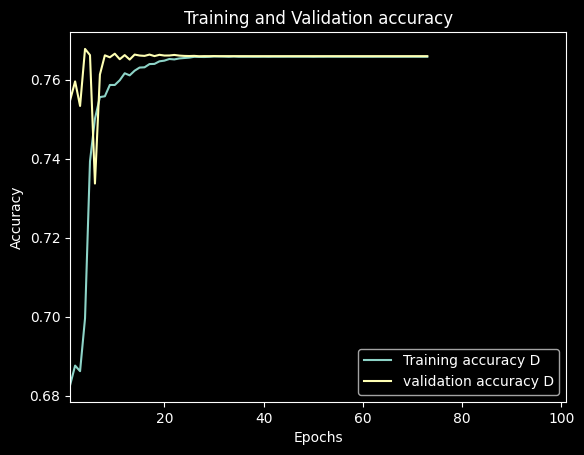

In [ ]:
plot_graph_of_history([history_nn], 'Deep Neural Network', 100)

### CNN

In [ ]:
# Define model architecture
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=max_seq_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
# history1 = model.fit(padded_sequences, labels, validation_split=0.2, epochs=10, batch_size=32)
history_cnn = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=2048, callbacks=[es])

Epoch 1/100
406/406 [==============================] - 98s 233ms/step - loss: 0.2469 - accuracy: 0.9027 - val_loss: 0.1909 - val_accuracy: 0.9288
Epoch 2/100
406/406 [==============================] - 49s 122ms/step - loss: 0.1508 - accuracy: 0.9434 - val_loss: 0.1960 - val_accuracy: 0.9281
Epoch 3/100
406/406 [==============================] - 40s 99ms/step - loss: 0.1094 - accuracy: 0.9617 - val_loss: 0.2149 - val_accuracy: 0.9239
Epoch 4/100
406/406 [==============================] - 29s 72ms/step - loss: 0.0848 - accuracy: 0.9716 - val_loss: 0.2350 - val_accuracy: 0.9211
Epoch 5/100
406/406 [==============================] - 27s 66ms/step - loss: 0.0689 - accuracy: 0.9776 - val_loss: 0.2587 - val_accuracy: 0.9186
Epoch 6/100
406/406 [==============================] - 26s 64ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.2811 - val_accuracy: 0.9164
Epoch 7/100
406/406 [==============================] - 24s 58ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.3043 - val_

In [ ]:
# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(loss))
print("Test accuracy: {:.3f}".format(accuracy))

13906/13906 [==============================] - 39s 3ms/step - loss: 1.8098 - accuracy: 0.6789
Test loss: 1.810
Test accuracy: 0.679


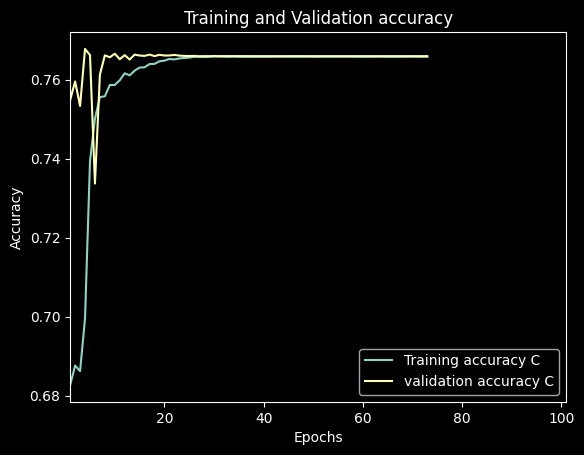

In [ ]:
plot_graph_of_history([history_nn], 'CNN', 100)

### LSTM

In [25]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=max_seq_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history_lstm = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=2048, callbacks=[es])

Epoch 1/100
406/406 [==============================] - 274s 655ms/step - loss: 0.2487 - accuracy: 0.8990 - val_loss: 0.1897 - val_accuracy: 0.9296
Epoch 2/100
406/406 [==============================] - 234s 576ms/step - loss: 0.1510 - accuracy: 0.9444 - val_loss: 0.1956 - val_accuracy: 0.9285
Epoch 3/100
406/406 [==============================] - 227s 559ms/step - loss: 0.1206 - accuracy: 0.9572 - val_loss: 0.2069 - val_accuracy: 0.9243
Epoch 4/100
406/406 [==============================] - 224s 552ms/step - loss: 0.1039 - accuracy: 0.9637 - val_loss: 0.2247 - val_accuracy: 0.9228
Epoch 5/100
406/406 [==============================] - 227s 560ms/step - loss: 0.0907 - accuracy: 0.9683 - val_loss: 0.2485 - val_accuracy: 0.9212
Epoch 6/100
406/406 [==============================] - 224s 553ms/step - loss: 0.0801 - accuracy: 0.9719 - val_loss: 0.2714 - val_accuracy: 0.9198
Epoch 7/100
406/406 [==============================] - 220s 542ms/step - loss: 0.0722 - accuracy: 0.9747 - val_loss: 0

In [26]:
# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(loss))
print("Test accuracy: {:.3f}".format(accuracy))

13906/13906 [==============================] - 475s 34ms/step - loss: 1.8744 - accuracy: 0.6771
Test loss: 1.874
Test accuracy: 0.677


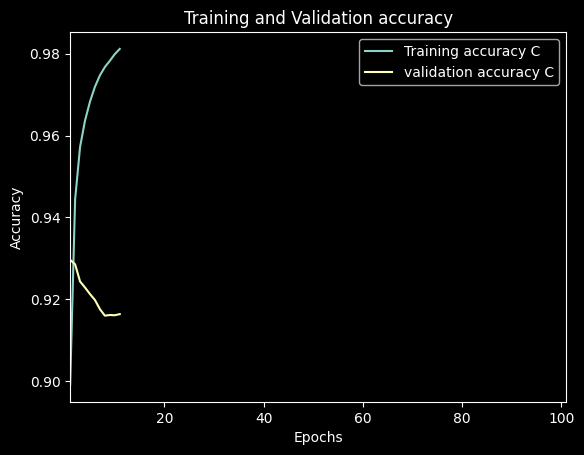

In [28]:
plot_graph_of_history([history_lstm], 'CNN', 100)

# Machine Learning Implementation

## TF-IDF Vectorizer

In [ ]:
k =['CommentId', 'language', 'user_index', 'post_index','report_count_comment','report_count_post','like_count_comment','like_count_post']
for col in df.columns:
    if col in k:
        del df[col]
len(df[df['label'] == 1])

In [ ]:
df.isna().sum()

commentText      1
label          219
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df['commentText'], df['label'], test_size=0.4, stratify=df['label'], random_state=42)
n = len(X_train)
m = len(X_test)

In [ ]:
vectorizer = TfidfVectorizer(stop_words=['english'])
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.fit_transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, strip_accents='ascii', stop_words='english', ngram_range=(1,2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Classifier

### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr):
    # Train the KNN algorithm
    x_trainlr, y_trainlr, x_testlr, y_testlr = x_trainlr[:100000], y_trainlr[:100000], x_testlr[:100000], y_testlr[:100000]
    for i in range(1, 6):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_trainlr, y_trainlr)
        # Predict the classes of the testing data
        y_pred = knn.predict(x_testlr)
        # Evaluate the performance of the algorithm
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of KNN with n =', i, 'is', accuracy)
        print('recall of KNN with n =', i, 'is', recall)
        print('confusion matrix of KNN with n =', i, 'is', cm)
        print()
        del knn, y_pred
#         i = 1
#         print(1)
#         knn = KNeighborsClassifier(n_neighbors=i)
#         print(2)
#         knn.fit(x_trainlr, y_trainlr)
#         print(3)
#         # Predict the classes of the testing data
#         y_pred = knn.predict(x_testlr)
#         print(4)
#         # Evaluate the performance of the algorithm
#         accuracy = accuracy_score(y_testlr, y_pred)
#         recall = recall_score(y_testlr, y_pred)
#         cm = confusion_matrix(y_testlr,y_pred)
#         print('accuracy of KNN with n =', i, 'is', accuracy)
#         print('recall of KNN with n =', i, 'is', recall)
#         print('confusion matrix of KNN with n =', i, 'is', cm)
#         print()
#         del knn, y_pred

In [ ]:
k_n_n(X_train, y_train, X_test, y_test)

accuracy of KNN with n = 1 is 0.82054
recall of KNN with n = 1 is 0.3541816947426486
confusion matrix of KNN with n = 1 is [[73707  2726]
 [15220  8347]]

accuracy of KNN with n = 2 is 0.8061
recall of KNN with n = 2 is 0.1992616794670514
confusion matrix of KNN with n = 2 is [[75914   519]
 [18871  4696]]

accuracy of KNN with n = 3 is 0.82181
recall of KNN with n = 3 is 0.29006661857682353
confusion matrix of KNN with n = 3 is [[75345  1088]
 [16731  6836]]

accuracy of KNN with n = 4 is 0.80568
recall of KNN with n = 4 is 0.19658844995120295
confusion matrix of KNN with n = 4 is [[75935   498]
 [18934  4633]]

accuracy of KNN with n = 5 is 0.81408
recall of KNN with n = 5 is 0.25047736241354435
confusion matrix of KNN with n = 5 is [[75505   928]
 [17664  5903]]



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr):
    x_trainlr, y_trainlr, x_testlr, y_testlr = x_trainlr[:10000], y_trainlr[:10000], x_testlr[:10000], y_testlr[:10000]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for ker in kernels:
        svr = SVC(kernel = ker)
        svr.fit(x_trainlr,y_trainlr)
        y_pred = svr.predict(x_testlr)
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of SVM with kernel =', ker, 'is', accuracy)
        print('recall of SVM with kernel =', ker, 'is', recall)
        print('confusion matrix of SVM with kernel =', ker, 'is', cm)
        print()
        del svr, y_pred

In [ ]:
s_v_m(X_train, y_train, X_test, y_test)

accuracy of SVM with kernel = linear is 0.8759
recall of SVM with kernel = linear is 0.5620374401393121
confusion matrix of SVM with kernel = linear is [[7468  235]
 [1006 1291]]

accuracy of SVM with kernel = poly is 0.7802
recall of SVM with kernel = poly is 0.06399651719634306
confusion matrix of SVM with kernel = poly is [[7655   48]
 [2150  147]]

accuracy of SVM with kernel = rbf is 0.8587
recall of SVM with kernel = rbf is 0.49673487157161517
confusion matrix of SVM with kernel = rbf is [[7446  257]
 [1156 1141]]

accuracy of SVM with kernel = sigmoid is 0.8586
recall of SVM with kernel = sigmoid is 0.5102307357422725
confusion matrix of SVM with kernel = sigmoid is [[7414  289]
 [1125 1172]]



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr):
    solvers = ['lbfgs', 'liblinear', 'newton-cg']
#     ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    for sol in solvers:
        logisticRegr = LogisticRegression(solver=sol, max_iter=100000)
        logisticRegr.fit(x_trainlr, y_trainlr)
        y_pred = logisticRegr.predict(x_testlr)
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of LogisticRegression with solver =', sol, 'is', accuracy)
        print('recall of LogisticRegression with solver =', sol, 'is', recall)
        print('confusion matrix of LogisticRegression with solver =', sol, 'is', cm)
        print()
        del logisticRegr, y_pred

In [ ]:
logistic_regression(X_train, y_train, X_test, y_test)

accuracy of LogisticRegression with solver = lbfgs is 0.9170357785733066
recall of LogisticRegression with solver = lbfgs is 0.7536342439333314
confusion matrix of LogisticRegression with solver = lbfgs is [[219685   7495]
 [ 17117  52361]]

accuracy of LogisticRegression with solver = liblinear is 0.9170492621132752
recall of LogisticRegression with solver = liblinear is 0.7536342439333314
confusion matrix of LogisticRegression with solver = liblinear is [[219689   7491]
 [ 17117  52361]]

accuracy of LogisticRegression with solver = newton-cg is 0.9170155532633537
recall of LogisticRegression with solver = newton-cg is 0.753619850888051
confusion matrix of LogisticRegression with solver = newton-cg is [[219680   7500]
 [ 17118  52360]]



### Naive Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr):
    # Train Naive Bayes classifier
    clf = MultinomialNB()
    clf.fit(x_trainlr, y_trainlr)
    # Predict labels for testing set
    y_pred = clf.predict(x_testlr)
    accuracy = accuracy_score(y_testlr, y_pred)
    recall = recall_score(y_testlr, y_pred)
    cm = confusion_matrix(y_testlr,y_pred)
    print('accuracy of Naive Bayes Classifier(m) is', accuracy)
    print('recall of Naive Bayes Classifier is', recall)
    print('confusion matrix of Naive Bayes Classifier is', cm)
    print()
    del clf
    
    
    # MemoryError: Unable to allocate 1.48 TiB for an array with shape (889971, 1831247) and data type int8

#     x_trainlr = x_trainlr.astype(np.int8)
#     x_testlr = x_testlr.astype(np.int8)
# #     for i in x_trainlr[:1:10]:
# #         xt.append(i.toarray())
# #     x_trainlr = xt
# #     x_testlr = x_testlr[:10]
#     x_trainlr = x_trainlr.toarray()
#     x_testlr = x_testlr.toarray()
#     print(x_trainlr)
#     clf = GaussianNB()
#     clf.fit(x_trainlr, y_trainlr)
#     # Predict labels for testing set
#     y_pred = clf.predict(x_testlr)
#     accuracy = accuracy_score(y_testlr, y_pred)
#     recall = recall_score(y_testlr, y_pred)
#     cm = confusion_matrix(y_testlr,y_pred)
#     print('accuracy of Naive Bayes Classifier(g) is', accuracy)
#     print('recall of Naive Bayes Classifier is', recall)
#     print('confusion matrix of Naive Bayes Classifier is', cm)
#     print()
#     del clf

In [ ]:
n_b_g(X_train, y_train, X_test, y_test)

accuracy of Naive Bayes Classifier(m) is 0.8902977339187447
recall of Naive Bayes Classifier is 0.7332033161576327
confusion matrix of Naive Bayes Classifier is [[426344  28015]
 [ 37073 101883]]



### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(max_depth=50)
clf = clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
print('accuracy_score:', accuracy_score(y_test, pred))
print('precision_score:', precision_score(y_test, pred))
print('recall_score:', recall_score(y_test, pred))
print('f1_score:', f1_score(y_test, pred))

accuracy_score: 0.7710832001833762
precision_score: 0.9192513368983958
recall_score: 0.02474164483721466
f1_score: 0.04818635420754611


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[227029,    151],
       [ 67759,   1719]], dtype=int64)